# 1.Clone source code from GitHub

In [ ]:
!git clone https://github.com/NathanUA/BASNet.git

Cloning into 'BASNet'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 255 (delta 66), reused 57 (delta 57), pack-reused 182
Receiving objects: 100% (255/255), 3.60 MiB | 39.17 MiB/s, done.
Resolving deltas: 100% (126/126), done.


In [ ]:
%cd BASNet

/content/BASNet


# 2.Download pre trained weight

In [ ]:
!pip install gdown
!pip install cluster

In [ ]:
import os
import gdown
os.makedirs('./saved_models/basnet_bsi', exist_ok=True)
gdown.download('https://drive.google.com/uc?id=1s52ek_4YTDRt_EOkx1FS53u-vJa0c4nu',
    './saved_models/basnet_bsi/basnet.pth',
    quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1s52ek_4YTDRt_EOkx1FS53u-vJa0c4nu
To: /content/BASNet/saved_models/basnet_bsi/basnet.pth
348MB [00:02, 120MB/s]


'./saved_models/basnet_bsi/basnet.pth'

# 3.Run basnet_test.py

In [ ]:
!python basnet_test.py

...load BASNet...
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100% 83.3M/83.3M [00:00<00:00, 87.9MB/s]
inferencing: 0003.jpg
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7

# 4.Display a result

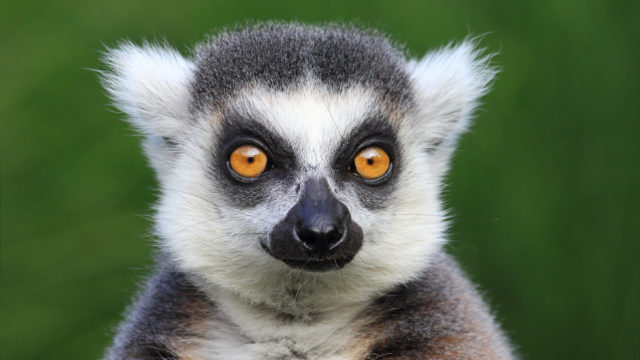

In [ ]:
from PIL import Image
from IPython.display import display
img_input = Image.open('/content/BASNet/test_data/test_images/0005.jpg')
display(img_input)

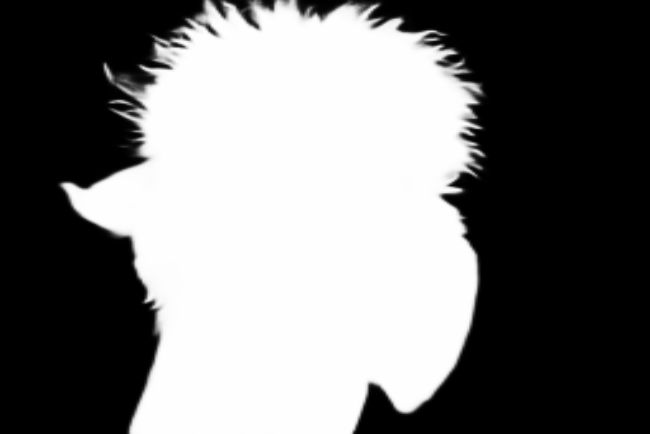

In [ ]:
img_output = Image.open('/content/BASNet/test_data/test_results/0003.png')
display(img_output)

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
# from datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle
from PIL import Image

In [ ]:
!pip install cluster

In [ ]:
img = Image.open('/content/BASNet/test_data/test_images/0012.jpg')
img2 = Image.open('/content/BASNet/test_data/test_results/0012.png')
img3 = Image.open('/content/BASNet/test_data/test_images/0012.jpg')


In [ ]:
img1 = img
img = np.array(img)

img3 = np.array(img3)
img2 = np.array(img2)
print(img.shape)
li = []
li.append(img.shape[0])
li.append(img.shape[1])
li

(1200, 1600, 3)


[1200, 1600]

In [ ]:
for i in range(li[0]):
  for j in range(li[1]):
    if ((255-img2[i][j][0])*(255-img2[i][j][2])*(255-img2[i][j][1])<=(img2[i][j][0])*(img2[i][j][2])*(img2[i][j][1])):
      img[i][j] = [255,255,255]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


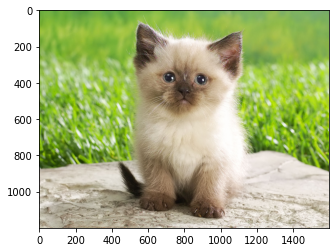

In [ ]:
plt.figure(2)
plt.subplot(1, 1, 1)
plt.imshow(img3)

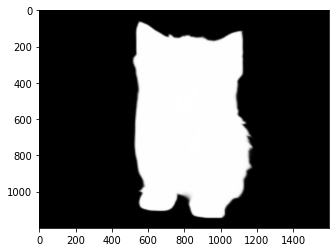

In [ ]:
plt.figure(2)
plt.subplot(1, 1, 1)
plt.imshow(img2)
# print(img.shape)
# plt.axis('off')
# plt.subplot(2, 2,1)

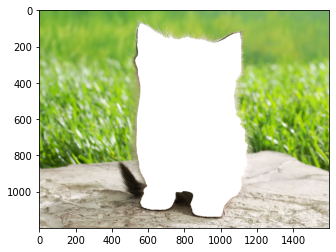

In [ ]:
plt.figure(2)
plt.subplot(1, 1, 1)
plt.imshow(img)
# print(img.shape)
# plt.axis('off')
# plt.subplot(2, 2,1)

In [ ]:
#Need to convert image into feature array based
flatten_img=np.reshape(img, [-1, 3])
#bandwidth estimation
est_bandwidth = estimate_bandwidth(flatten_img,
quantile=.2, n_samples=500)
mean_shift = MeanShift(est_bandwidth, bin_seeding=True)
mean_shift.fit(flatten_img)
labels= mean_shift.labels_


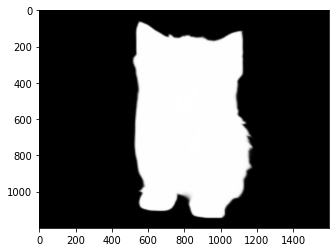

In [ ]:
# Plot image vs segmented image
plt.figure(2)
plt.subplot(1, 1, 1)
plt.imshow(img2)
# print(img.shape)
# plt.axis('off')
# plt.subplot(2, 2,1)


(-0.5, 1599.5, 1199.5, -0.5)

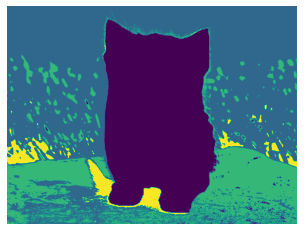

In [ ]:
plt.imshow(np.reshape(labels, li))
plt.axis('off')